In [1]:
import os
from PIL import Image
import numpy as np
from skimage.filters import gaussian
from skimage import img_as_float

In [7]:
def load_image(image_path):
    """Carga una imagen desde la ruta dada y la convierte a un array de NumPy."""
    image = Image.open(image_path)
    return np.array(image)

def resize_image(image, size):
    """Redimensiona la imagen al tamaño especificado."""
    image = Image.fromarray(image)
    image = image.resize(size)
    return np.array(image)

def normalize_image(image):
    """Normaliza la imagen a valores entre 0 y 1."""
    return image / 255.0

def apply_gaussian_blur(image, sigma=1):
    """Aplica un filtro de desenfoque gaussiano a la imagen."""
    image_float = img_as_float(image)  # Convierte la imagen a float
    if image_float.ndim == 3:  # Imagen a color
        blurred_image = np.zeros_like(image_float)
        for i in range(image_float.shape[2]):  # Aplica el desenfoque a cada canal
            blurred_image[:, :, i] = gaussian(image_float[:, :, i], sigma=sigma)
        return blurred_image
    else:  # Imagen en escala de grises
        return gaussian(image_float, sigma=sigma)

def save_image(image, save_path):
    """Guarda la imagen en la ruta especificada."""
    if image.ndim == 3 and image.shape[2] == 4:  # Imagen con canal alfa
        # Convertir la imagen a RGB (descartando el canal alfa)
        image = Image.fromarray((image[:, :, :3] * 255).astype(np.uint8))
    else:
        image = Image.fromarray((image * 255).astype(np.uint8))
    
    image.save(save_path)

def process_images_in_folder(folder_path, output_folder):
    """Procesa todas las imágenes en una carpeta y guarda los resultados en una carpeta de salida."""
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name)
        output_class_path = os.path.join(output_folder, class_name)
        
        if not os.path.exists(output_class_path):
            os.makedirs(output_class_path)
        
        for file_name in os.listdir(class_path):
            if file_name.endswith('.jpg') or file_name.endswith('.png'):
                image_path = os.path.join(class_path, file_name)
                save_path = os.path.join(output_class_path, file_name)
                
                image = load_image(image_path)
                image = resize_image(image, (256, 256))  # Redimensionar a 256x256
                image = normalize_image(image)
                image = apply_gaussian_blur(image, sigma=2)
                save_image(image, save_path)

def main():
    base_dir = 'proyecto'  # Cambia esto si tu carpeta está en una ruta diferente
    output_base_dir = 'proyecto_preprocesado'
    
    for split in ['train', 'test', 'validation']:
        split_folder_path = os.path.join(base_dir, split)
        output_split_folder = os.path.join(output_base_dir, split)
        
        process_images_in_folder(split_folder_path, output_split_folder)

main()


# Implementación paso a paso

1. Configuración Inicial

In [9]:
import os

# Rutas de los directorios
base_dir = 'proyecto'
output_base_dir = 'proyecto_preprocesado'
class_names = ['apple', 'banana', 'orange', 'pineapple', 'watermelon']

def create_output_directories(base_output_dir, class_names):
    """Crea los directorios de salida para las imágenes preprocesadas."""
    for class_name in class_names:
        class_output_dir = os.path.join(base_output_dir, 'train', class_name)
        if not os.path.exists(class_output_dir):
            os.makedirs(class_output_dir)
        class_output_dir = os.path.join(base_output_dir, 'test', class_name)
        if not os.path.exists(class_output_dir):
            os.makedirs(class_output_dir)
        class_output_dir = os.path.join(base_output_dir, 'validation', class_name)
        if not os.path.exists(class_output_dir):
            os.makedirs(class_output_dir)

create_output_directories(output_base_dir, class_names)



2. Cargar y Visualizar Imágenes

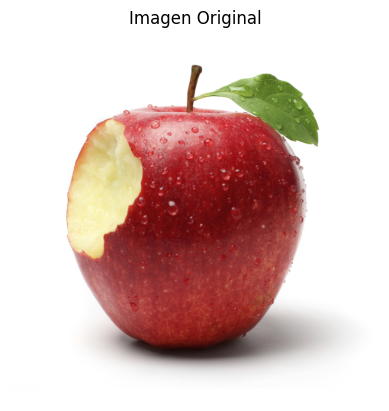

In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def load_image(image_path):
    """Carga una imagen desde la ruta dada y la convierte a un array de NumPy."""
    image = Image.open(image_path)
    return np.array(image)

def display_image(image, title="Image"):
    """Muestra una imagen usando matplotlib."""
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Ejemplo de carga y visualización de una imagen
image_path = 'proyecto/Train/apple/Image_1.jpg'  # Cambia esto a la ruta de tu imagen
image = load_image(image_path)
display_image(image, title="Imagen Original")


3. Redimensionar Imágenes

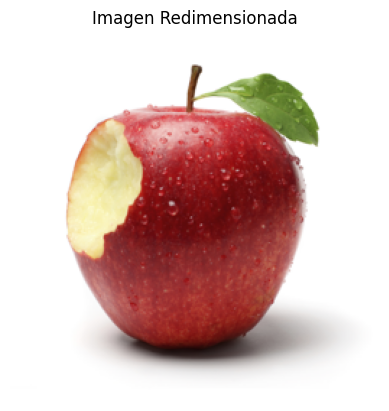

In [13]:
def resize_image(image, size):
    """Redimensiona la imagen al tamaño especificado."""
    image = Image.fromarray(image)
    image = image.resize(size)
    return np.array(image)

# Ejemplo de redimensionamiento
resized_image = resize_image(image, (256, 256))
display_image(resized_image, title="Imagen Redimensionada")


4. Normalizar Imágenes

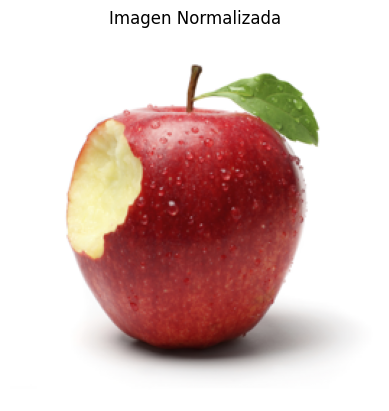

In [14]:
def normalize_image(image):
    """Normaliza la imagen a valores entre 0 y 1."""
    return image / 255.0

# Ejemplo de normalización
normalized_image = normalize_image(resized_image)
display_image(normalized_image, title="Imagen Normalizada")


5. Ajustar Contraste y Brillo

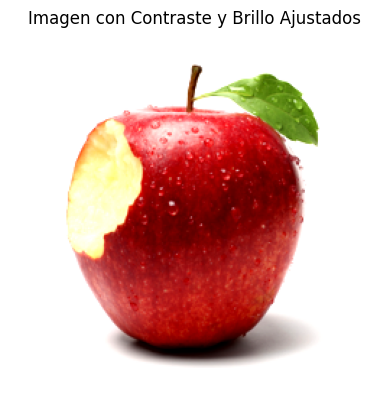

In [15]:
from PIL import ImageEnhance

def adjust_contrast_brightness(image, contrast_factor=1.2, brightness_factor=1.2):
    """Ajusta el contraste y el brillo de la imagen."""
    image = Image.fromarray((image * 255).astype(np.uint8))  # Convertir a PIL Image
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(contrast_factor)
    enhancer = ImageEnhance.Brightness(image)
    image = enhancer.enhance(brightness_factor)
    return np.array(image) / 255.0  # Convertir de vuelta a array normalizado

# Ejemplo de ajuste de contraste y brillo
adjusted_image = adjust_contrast_brightness(normalized_image)
display_image(adjusted_image, title="Imagen con Contraste y Brillo Ajustados")


6. Equalizar el Histograma

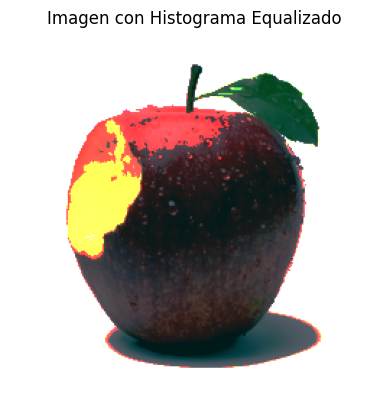

In [16]:
from skimage import exposure

def equalize_histogram(image):
    """Aplica la equalización del histograma a la imagen."""
    if image.ndim == 3:
        return np.stack([exposure.equalize_hist(image[:, :, i]) for i in range(image.shape[2])], axis=-1)
    else:
        return exposure.equalize_hist(image)

# Ejemplo de equalización de histograma
equalized_image = equalize_histogram(adjusted_image)
display_image(equalized_image, title="Imagen con Histograma Equalizado")


7. Reducir Ruido

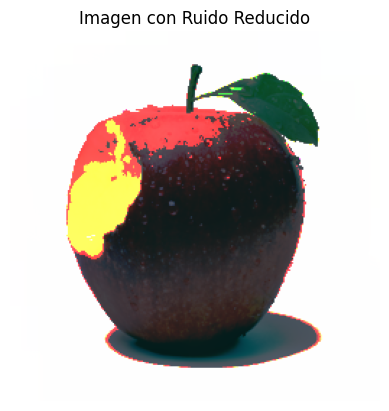

In [18]:
from skimage.restoration import denoise_bilateral

def reduce_noise(image, sigma_color=0.05, sigma_spatial=15):
    """Aplica un filtro de reducción de ruido bilateral a cada canal de color de una imagen RGB."""
    if image.ndim == 3 and image.shape[2] == 3:  # Imágenes RGB
        # Aplicar el filtro bilateral a cada canal
        denoised_channels = [denoise_bilateral(image[:, :, i], sigma_color=sigma_color, sigma_spatial=sigma_spatial)
                             for i in range(image.shape[2])]
        return np.stack(denoised_channels, axis=-1)
    elif image.ndim == 2:  # Imágenes en escala de grises
        return denoise_bilateral(image, sigma_color=sigma_color, sigma_spatial=sigma_spatial)
    else:
        raise ValueError("El filtro bilateral solo es compatible con imágenes en escala de grises o RGB.")

# Ejemplo de reducción de ruido
denoised_image = reduce_noise(equalized_image)
display_image(denoised_image, title="Imagen con Ruido Reducido")


In [20]:
def save_image(image, save_path):
    """Guarda la imagen en la ruta especificada."""
    if image.ndim == 3 and image.shape[2] == 4:  # Imagen con canal alfa
        # Convertir la imagen a RGB (descartando el canal alfa)
        image = Image.fromarray((image[:, :, :3] * 255).astype(np.uint8))
    else:
        image = Image.fromarray((image * 255).astype(np.uint8))
    
    image.save(save_path)

# Ejemplo de guardado de imagen
save_path = 'proyecto_preprocesado/train/apple/apple1_processed.jpg'  # Cambia esto a tu ruta de salida
save_image(denoised_image, save_path)


Procesar Todas las Imágenes en Carpetas

In [ ]:
def process_images_in_folder(folder_path, output_folder):
    """Procesa todas las imágenes en una carpeta y guarda los resultados en una carpeta de salida."""
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name)
        output_class_path = os.path.join(output_folder, class_name)
        
        if not os.path.exists(output_class_path):
            os.makedirs(output_class_path)
        
        for file_name in os.listdir(class_path):
            if file_name.endswith('.jpg') or file_name.endswith('.png'):
                image_path = os.path.join(class_path, file_name)
                save_path = os.path.join(output_class_path, file_name)
                
                image = load_image(image_path)
                image = resize_image(image, (256, 256))  # Redimensionar a 256x256
                image = normalize_image(image)
                image = adjust_contrast_brightness(image)  # Ajustar contraste y brillo
                image = equalize_histogram(image)  # Equalizar histograma
                image = reduce_noise(image)  # Reducir ruido
                #image = apply_gaussian_blur(image, sigma=2)  
                save_image(image, save_path)

def main():
    for split in ['train', 'test', 'validation']:
        split_folder_path = os.path.join(base_dir, split)
        output_split_folder = os.path.join(output_base_dir, split)
        
        create_output_directories(output_split_folder, class_names)  # Crea los directorios de salida si no existen
        process_images_in_folder(split_folder_path, output_split_folder)

main()


Solo a las imagenes de entrenamiento 

In [ ]:
import os

def process_images_in_folder(folder_path, output_folder):
    """Procesa todas las imágenes en una carpeta y guarda los resultados en una carpeta de salida."""
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name)
        output_class_path = os.path.join(output_folder, class_name)
        
        if not os.path.exists(output_class_path):
            os.makedirs(output_class_path)
        
        for file_name in os.listdir(class_path):
            if file_name.endswith('.jpg') or file_name.endswith('.png'):
                image_path = os.path.join(class_path, file_name)
                save_path = os.path.join(output_class_path, file_name)
                
                image = load_image(image_path)
                image = resize_image(image, (256, 256))  # Redimensionar a 256x256
                image = normalize_image(image)
                image = adjust_contrast_brightness(image)  # Ajustar contraste y brillo
                image = equalize_histogram(image)  # Equalizar histograma
                image = reduce_noise(image)  # Reducir ruido
                #image = apply_gaussian_blur(image, sigma=2)  # Aplicar desenfoque gaussiano (opcional)
                save_image(image, save_path)

def main():
    # Procesar solo la carpeta de entrenamiento
    train_folder_path = os.path.join(base_dir, 'train')
    output_train_folder = os.path.join(output_base_dir, 'train')
    
    create_output_directories(output_train_folder, class_names)  # Crea los directorios de salida si no existen
    process_images_in_folder(train_folder_path, output_train_folder)

main()
